#  Numerical and Practical Bit Allocation for TwoDimensional Signals

In [170]:
import cv2 as cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import typing

Consider a function
$$ \phi(x, y) = A \cos(2\pi \omega_x x)\sin(2\pi \omega_y y)  \\ \text{for} \quad (x, y) \in [0, 1] \times [0, 1] \quad (4) $$
where $A = 2500$ $\omega_x = 2$ and $\omega_y = 7$.






###a.

Mathematically develop formulas for derivatives and integrals

to calculate the value range, the horizontal-derivative energy,

and the vertical-derivative energy.

**Solution**


The partial derivatives of $\phi(x,y)$ are:

$$(1) \quad \frac{∂}{∂x}[\phi(x,y)] = A\sin(2\pi \omega_y y)(-\sin(2\pi \omega_x x)2\pi\omega_x = \\ -2A\pi\omega_x\sin(2\pi \omega_x x)\sin(2\pi \omega_y y)$$

$$(2) \quad\frac{∂}{∂y}[\phi(x,y)] = A\cos(2\pi \omega_x x)\cos(2\pi \omega_y y)2\pi\omega_y = \\ 2A\pi\omega_y\cos(2\pi \omega_x x)\cos(2\pi \omega_y y)$$

The energy of the partial derivatives are:

$$(3) ∫∫_{[0,1]^2} ({\frac{∂ \phi}{∂x}(x,y)})^2 \, \text{dxdy} = \\
∫∫_{[0,1]^2} (-2A\pi\omega_x\sin(2\pi \omega_x x)\sin(2\pi \omega_y y))^2 \,dx dy =\\
2^2A^2\pi^2\omega_x^2\int_0^1\int_0^1 \sin(2\pi \omega_x x)^2\sin(2\pi \omega_y y)^2 \,dy \,dx = \\
4A^2\pi^2\omega_x^2(\int_0^1 {\sin(2\pi \omega_x x)}^2 \,dx)(\int_0^1 {\sin(2\pi \omega_y y)}^2 \, dy) \,\underset{{sin(x)}^2 = \frac{1-cos(2x)}{2}}{\text{=}} \\
4A^2\pi^2\omega_x^2 (\int_0^1 \frac{1- cos(4\pi\omega_xx)}{2}\,dx)(\int_0^1 \frac{1- cos(4\pi\omega_yy)}{2}\, dy) = \\
4A^2\pi^2\omega_x^2 \frac{1}{2}[x - \frac{sin(4\pi\omega_xx)}{4\pi\omega_x}]_0^1\frac{1}{2}[y - \frac{sin(4\pi\omega_yy)}{4\pi\omega_y}]_0^1 \underset{w_x, w_y \,\text{are integers}}{\text{=}} \\
4A^2\pi^2\omega_x^2 \frac{1}{4}\cdot 1 \cdot 1 =   A^2\pi^2\omega_x^2
$$

$$(4) ∫∫_{[0,1]^2} ({\frac{∂ \phi}{∂y}(x,y)})^2 \, \text{dxdy} = \\
∫∫_{[0,1]^2} (2A\pi\omega_y\cos(2\pi \omega_x x)\cos(2\pi \omega_y y)^2 \,dx dy =\\
2^2A^2\pi^2\omega_y^2\int_0^1\int_0^1 \cos(2\pi \omega_x x)^2\cos(2\pi \omega_y y)^2 \,dy \,dx = \\
4A^2\pi^2\omega_y^2(\int_0^1 {\cos(2\pi \omega_x x)}^2 \,dx)(\int_0^1 {\cos(2\pi \omega_y y)}^2 \, dy) \,\underset{{cos(x)}^2 = \frac{1+cos(2x)}{2}}{\text{=}} \\
4A^2\pi^2\omega_y^2 (\int_0^1 \frac{1+cos(4\pi\omega_xx)}{2}\,dx)(\int_0^1 \frac{1+cos(4\pi\omega_yy)}{2}\, dy) = \\
4A^2\pi^2\omega_y^2 \frac{1}{2}[x + \frac{sin(4\pi\omega_xx)}{4\pi\omega_x}]_0^1\frac{1}{2}[y + \frac{sin(4\pi\omega_yy)}{4\pi\omega_y}]_0^1 \underset{w_x, w_y \,\text{are integers}}{\text{=}} \\
4A^2\pi^2\omega_y^2 \frac{1}{4}\cdot 1 \cdot 1 =   A^2\pi^2\omega_y^2
$$


(5) The value Range of the function $\phi(x,y) = \phi(x, y) = A \cos(2\pi \omega_x x)\sin(2\pi \omega_y y)$ is $[-A,A]$.

The reason is that $ -1 \le \cos(2\pi \omega_x x) \le 1$ and
$ -1 \le \sin(2\pi \omega_y y) \le 1$.

Therefore, their product is bounded: $-1 \le \cos(2\pi \omega_x x)\sin(2\pi \omega_y y) \le 1$.

Multiplying by A we get that the possible range of values the function can get is $[-A,A]$.

Thus, we get that $Range(\phi)= 2A$


Given that $A = 2500$ $\omega_x = 2$ and $\omega_y = 7$ we get:

Energy($\frac{\partial \phi(x,y)}{∂x}) =  A^2\pi^2\omega_x^2 = 2500^2 \cdot 4 \cdot \pi^2$

Energy($\frac{\partial \phi(x,y)}{∂y}) =  A^2\pi^2\omega_y^2 = 2500^2 \cdot 49 \cdot \pi^2$

Value range = 2A= 5000

###b.
Approximate the continuous-domain signal $\phi(x,y)$ by a very high resolution digitalization.

Present the signal as an image using the cv2.imshow function

(use an appropriate gray-level scaling that suits the value of A).

**Solution** :We will present the signal
using uniform sampling
(high number of samples)

and high number of quantiaztion levels (256)

In [171]:
def uniform_quantization_image(image: np.array ,b: int, low: int,high: int,
                               is_high_included: bool):
  n_representaion_levels = np.power(2, b)
  delta= (high -low) / n_representaion_levels

  # Perform uniform quantization using the formula from class
  quantized_image = low + (np.floor((image - low) / delta) + 0.5) * delta

  if is_high_included:
    # Handle the exact maximum value separately
    #(Because the formula isn't working when high value included)
    last_rep_level = low + (n_representaion_levels -0.5)*delta
    quantized_image[image == high] = last_rep_level

  unique_values = np.unique(quantized_image)  # Get unique quantized values
  return quantized_image


class Signal:
    def __init__(self, A: int, omega_x: int, omega_y: int):
        self.A = A
        self.omega_x = omega_x
        self.omega_y = omega_y

    def calc_signal(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.A * np.cos(2 * np.pi * self.omega_x * x) \
        * np.sin(2 * np.pi * self.omega_y * y)

    def calc_signal_point(self, x: float, y: float) -> float:
        x_arr = np.array([x])
        y_arr = np.array([y])
        return self.calc_signal(x_arr, y_arr).item()

    def quantize_signal(self, x: np.ndarray, y: np.ndarray, b: int):
        # Sample the signal
        sampled = self.calc_signal(x, y)

        # Normalize the between 0 and 1
        min = np.min(sampled)
        max = np.max(sampled)
        normalized = (sampled - min) / (max - min)
        #quantize
        quantized = uniform_quantization_image(normalized, b, 0, 1, True)
        return quantized

    def calc_numeric_value_range(self, sampled: np.ndarray) -> float:
        return np.max(sampled) - np.min(sampled)

    def calc_numeric_partial_derivatives(self, \
                                         x: np.ndarray, y: np.ndarray)-> tuple:
        partial_x = self.partial_x(x, y)
        partial_y = self.partial_y(x, y)
        return partial_x, partial_y

    def partial_x(self, x: np.ndarray, y: np.ndarray, delta: float = 1e-5) -> np.ndarray:
      signal_at_x = self.calc_signal(x, y)
      signal_at_x_plus_delta = self.calc_signal(x + delta, y)
      return (signal_at_x_plus_delta - signal_at_x) / delta

    def partial_y(self, x: np.ndarray, y: np.ndarray, delta: float = 1e-5) -> np.ndarray:
            signal_at_y = self.calc_signal(x, y)
            signal_at_y_plus_delta = self.calc_signal(x, y + delta)
            return (signal_at_y_plus_delta - signal_at_y) / delta

    def calc_numeric_partial_energy(self,
                                partial_derivative: np.ndarray, delta) -> float:
        return np.sum(partial_derivative ** 2) * delta * delta

    def calc_numeric_params(self,x: np.ndarray, y: np.ndarray, delta: float):
        # Sample the signal
        sampled = self.calc_signal(x, y)

        # Calculate value range numerically
        value_range = self.calc_numeric_value_range(sampled)

        # Calculate partial derivatives and energies numerically
        partial_x, partial_y = self.calc_numeric_partial_derivatives \
         (x,y)

        energy_x = self.calc_numeric_partial_energy(partial_x, delta)
        energy_y = self.calc_numeric_partial_energy(partial_y, delta)

        return value_range, energy_x, energy_y
    def calc_analytical_values(self) -> tuple:
        value_range = 2 * self.A
        energy_x = self.A**2 * np.pi**2 * self.omega_x**2
        energy_y = self.A**2 * np.pi**2 * self.omega_y**2
        return value_range, energy_x, energy_y



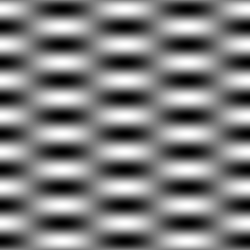

In [172]:
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=2, omega_y=7)
resolution = 250
b = 8 #eight bits for quantization

# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
cv2_imshow(quantized_uint8)


###c.
Numerically calculate the value-range, the horizontal-derivative energy and the vertical-derivative energy. Compare these numerical results to the analytically calculated
values from the question a.

**Solution**

In [173]:
# Define parameters
signal = Signal(A=2500, omega_x=2, omega_y=7)
resolution = 500
b = 8 #eight bits for quantization

# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

delta = 1/ resolution
value_range_num, energy_x_num, energy_y_num =  \
signal.calc_numeric_params(X, Y, delta)
value_range_ana, energy_x_ana, energy_y_ana = \
signal.calc_analytical_values()

print(f"Value range: Numerical: {value_range_num}"
      +f" Analytical: {value_range_ana}")
print(f"Energy of partial x: Numerical: {energy_x_num}" +
      f" Analytical: {np.round(energy_x_ana)}")
print(f"Energy of partial y: Numerical: {energy_y_num}"+
      f" Analytical: {np.round(energy_y_ana)}")



Value range: Numerical: 4999.506533092365 Analytical: 5000
Energy of partial x: Numerical: 246740109.70157394 Analytical: 246740110.0
Energy of partial y: Numerical: 3022566299.0979996 Analytical: 3022566348.0


### d.
Use the numerical approximations and write a function taht numerically solves the
bit-allocation optimization to determine Nx, Ny and b.

In [174]:
from scipy.special import lambertw
def find_optimal_Ns_for_b(E_x, E_y, b, B, value_range):
  # Since we have b*Nx*Ny=b we need to verify if we should decide
  #how to devide B/b between Nx and Ny
    ratio = np.sqrt(E_y / E_x)
    N_x = np.sqrt(B / (b * ratio))
    floor_Nx = np.floor(N_x)
    floor_Ny = np.floor(B / (floor_Nx*b))
    ceil_Nx = np.ceil(N_x)
    ceil_Ny = np.floor(B/(ceil_Nx*b))

    floor_MSE = approximated_MSE_2d(E_x, E_y, value_range, b, floor_Nx, floor_Ny)
    ceil_MSE = approximated_MSE_2d(E_x, E_y, value_range, b, ceil_Nx, ceil_Ny)
    assert(b * floor_Nx * floor_Ny <= B)
    assert(b * ceil_Nx * ceil_Ny <= B)
    if floor_MSE <= ceil_MSE:
        return floor_Nx, floor_Ny
    else:
        return ceil_Nx, ceil_Ny

def bit_allocation_optimization_lagrange(E_x, E_y, value_range, B):
    optimal_b = 0.5 * \
    np.log2((value_range**2 * np.log(2) * B) / (np.sqrt(E_y) * np.sqrt(E_x)))
    lower_b = np.floor(optimal_b)
    upper_b = np.ceil(optimal_b)

    lower_N_x, lower_N_y = find_optimal_Ns_for_b(E_x, E_y, lower_b, B, value_range)
    upper_N_x, upper_N_y = find_optimal_Ns_for_b(E_x, E_y, upper_b, B, value_range)

    lower_MSE = approximated_MSE_2d(E_x, E_y, value_range, lower_b, lower_N_x, lower_N_y)
    upper_MSE = approximated_MSE_2d(E_x, E_y, value_range, upper_b, upper_N_x, upper_N_y)

    if lower_MSE <= upper_MSE and lower_b * lower_N_x * lower_N_y <= B:
        return int(lower_b), int(lower_N_x), int(lower_N_y)
    elif upper_MSE < lower_MSE and upper_b * upper_N_x * upper_N_y <= B:
        return int(upper_b), int(upper_N_x), int(upper_N_y)
    else:
        raise Exception("No solution found")


def approximated_MSE_2d(E_x: float, E_y: float, value_range: float, b: float,
                     N_x: float, N_y: float) -> float:
    return (1/(12*(N_x**2))) * E_x + (1/(12*(N_y**2))) * E_y + (1/12) * (value_range**2) / (2**(2*b))

def approximated_MSE_1d(E: float, value_range: float, b: float, N: float) -> float:
    return (1/(12*(N**2))) * E + (1/12) * (value_range**2) / (2**(2*b))

def find_optimal_b_and_n_1d(E: float, value_range: float, B: float):
    C = (value_range**2 * np.log(2) * B**2) /E
    W_argument = 2 * np.log(2) * C
    W_value = lambertw(W_argument)
    assert(W_value.imag == 0)
    W_value = W_value.real
    b = W_value / (2 * np.log(2))
    assert(b<=B)
    upper_b = np.ceil(b)
    lower_b = np.floor(b)
    upper_MSE = approximated_MSE_1d(E, value_range, upper_b, B)
    lower_MSE = approximated_MSE_1d(E, value_range, lower_b, B)
    chosen_b = upper_b if (lower_MSE > upper_MSE and upper_b<=B )else lower_b
    N = np.floor(B/chosen_b)
    return int(chosen_b), int(N)

def bit_allocation_optimization_iterative(E_x, E_y, value_range, B, max_iter=100):
  #guess
  N_y = 10
  N_x = 0
  b = 0
  last_MSE = float('inf')
  for i in range(max_iter):
    B1 = np.floor(B/N_y)
    b, N_x = find_optimal_b_and_n_1d(E_x, value_range, B1)
    B2 = np.floor(B/N_x)
    b, N_y = find_optimal_b_and_n_1d(E_y, value_range, B2)
    b = np.floor(B/(N_x*N_y))
    assert(b * N_x * N_y <= B)
    MSE = approximated_MSE_2d(E_x, E_y, value_range, b, N_x, N_y)
    if np.abs(MSE - last_MSE) < 1e-9:
      break
    last_MSE = MSE

  return b, N_x, N_y

### e.

Consider two bit-allocation procedures with

the bit-budgets Blow = 5000 and Bhigh =50000.

Write the obtained values of Nx, Ny and b.

In [175]:
energy_x_num, energy_y_num, value_range_num
B_low = 5000
B_high = 50000

b_low_iter,N_x_low_iter,N_y_low_iter = bit_allocation_optimization_iterative(energy_x_num, energy_y_num,
                                        value_range_num, B_low)
print(f"Optimal solution iterative "+
f"for B={B_low} : b: {b_low_iter}, N_x: {N_x_low_iter}, N_y: {N_y_low_iter}")

b_low_lag,N_x_low_lag,N_y_low_lag = bit_allocation_optimization_lagrange(energy_x_num, energy_y_num,
                                        value_range_num, B_low)
print(f"Optimal solution Lagrange "+
f"for B={B_low} : b: {b_low_lag}, N_x: {N_x_low_lag}, N_y: {N_y_low_lag}")

b_high_iter,N_x_high_iter,N_y_high_iter = bit_allocation_optimization_iterative(energy_x_num, energy_y_num,
                                        value_range_num, B_high)
print(f"Optimal solution iterative "+
f"for B={B_high} : b: {b_high_iter}, N_x: {N_x_high_iter}, N_y: {N_y_high_iter}")

b_high_lag,N_x_high_lag,N_y_high_lag = bit_allocation_optimization_lagrange(energy_x_num, energy_y_num,
                                        value_range_num, B_high)
print(f"Optimal solution Lagrange "+
f"for B={B_high} : b: {b_high_lag}, N_x: {N_x_high_lag}, N_y: {N_y_high_lag}")

Optimal solution iterative for B=5000 : b: 4.0, N_x: 25, N_y: 50
Optimal solution Lagrange for B=5000 : b: 3, N_x: 21, N_y: 79
Optimal solution iterative for B=50000 : b: 6.0, N_x: 46, N_y: 181
Optimal solution Lagrange for B=50000 : b: 5, N_x: 54, N_y: 185


### g.
 Apply the practical searching procedure

 for two bit-budgets Blow = 5000 and Bhigh =50000.

 For each of the two bit-budgets, what are the optimal values of Nx, Ny and
b?

Are these similar to the corresponding values from the question e?
Explain it in detail.

Present the reconstructed images obtained in the experiments.

In [176]:
def bit_allocation_search(E_x, E_y, value_range, B, max_N=1000, max_b=20):
    best_mse = float('inf')
    best_params = (0, 0, 0)

    for b in range(1, max_b + 1):
        for N_x in range(1, max_N + 1):
            for N_y in range(1, max_N + 1):
                if N_x * N_y * b <= B:
                    mse = approximated_MSE_2d(E_x, E_y, value_range, b, N_x, N_y)
                    if mse < best_mse:
                        best_mse = mse
                        best_params = (b, N_x, N_y)

    if best_params == (0, 0, 0):
        raise Exception("No valid solution found")

    return best_params

b_low_search,N_x_low_search,N_y_low_search = \
 bit_allocation_search(energy_x_num, energy_y_num, value_range_num, B_low)
print(f"Optimal solution search procedure\n for B={B_low} :"+\
      f"b={b_low_search}, N_x={N_x_low_search}, N_y={N_y_low_search}")

b_high_search,N_x_high_search,N_y_high_search = \
bit_allocation_search(energy_x_num, energy_y_num, value_range_num, B_high)
print(f"Optimal solution search procedure\n for B={B_high} :"+\
      f"b={b_high_search}, N_x={N_x_high_search}, N_y={N_y_high_search}")


Optimal solution search procedure
 for B=5000 :b=3, N_x=21, N_y=79
Optimal solution search procedure
 for B=50000 :b=5, N_x=54, N_y=185


**Reconstruct The image**

In [177]:
#B=5000 lagrange
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=2, omega_y=7)
resolution_x = N_x_low_lag
resolution_y = N_y_low_lag
b = b_low_lag #eight bits for quantization
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange and search)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Lagrange and search) for b=3, N_x = 21, Ny=79


In [178]:
#B=5000 lagrange
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=2, omega_y=7)
resolution_x = N_x_low_lag
resolution_y = N_y_low_lag
b = b_low_lag #eight bits for quantization
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange and search)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Lagrange and search) for b=3, N_x = 21, Ny=79


Reconstruct image(Lagrange and search) for b=5, N_x = 54, Ny=185


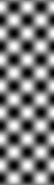

In [179]:
#B=50000 lagrange
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=2, omega_y=7)
resolution_x = N_x_high_lag
resolution_y = N_y_high_lag
b = b_high_lag #eight bits for quantization
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange and search)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Itreative) for b=6.0, N_x = 46, Ny=181


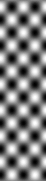

In [180]:
#B=50000 iterative
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=2, omega_y=7)
resolution_x = N_x_high_iter
resolution_y = N_y_high_iter
b = b_high_iter #eight bits for quantization
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Itreative)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

###h.
Consider the same function but with different parameters:
A = 2500, ωx = 7 and ωy = 2.
Repeat the analysis from question a to question g and compare the results.
Explain the differences.

###a.

Based on the calculations we showed in the previous a sections (we presented formulas for general parameters) we get:

Given that $A = 2500$ $\omega_x = 7$ and $\omega_y = 2$ we get:

Energy($\frac{\partial \phi(x,y)}{∂x}) =  A^2\pi^2\omega_x^2 = 2500^2 \cdot 49 \cdot \pi^2$

Energy($\frac{\partial \phi(x,y)}{∂y}) =  A^2\pi^2\omega_y^2 = 2500^2 \cdot 4 \cdot \pi^2$

Value range = 2A= 5000


### b.

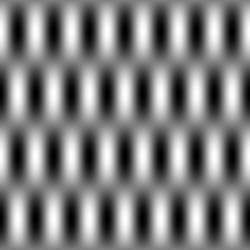

In [181]:
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution = 250
b = 8 #eight bits for quantization

# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
cv2_imshow(quantized_uint8)

###C.

In [182]:
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution = 5000
b = 8 #eight bits for quantization

# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

delta = 1/ resolution
value_range_num, energy_x_num, energy_y_num =  \
signal.calc_numeric_params(X, Y, delta)
value_range_ana, energy_x_ana, energy_y_ana = \
signal.calc_analytical_values()

print(f"Value range: Numerical: {value_range_num}"
      +f" Analytical: {value_range_ana}")
print(f"Energy of partial x: Numerical: {energy_x_num}" +
      f" Analytical: {np.round(energy_x_ana)}")
print(f"Energy of partial y: Numerical: {energy_y_num}"+
      f" Analytical: {np.round(energy_y_ana)}")

Value range: Numerical: 4999.99506519913 Analytical: 5000
Energy of partial x: Numerical: 3022566299.097137 Analytical: 3022566348.0
Energy of partial y: Numerical: 246740109.70160338 Analytical: 246740110.0


**Comparing results**

We got numeric value range 4999.995 vs analytival 5000.


We got numeric $E_x$= 3022566347.833 vs analytival $E_x$= 3022566348


We got numeric $E_y$= 246740110.0272 vs analytival $E_y$= 246740110



We got pretty close numerical and analytical energies, and also the value ranges are pretty close.

The results will be closer when the resolution gets higher, as we will approximate the integral and the derivative better.

###d+e

In [183]:
B_low = 5000
B_high = 50000

b_low_iter,N_x_low_iter,N_y_low_iter = bit_allocation_optimization_iterative(energy_x_num, energy_y_num,
                                        value_range_num, B_low)
print(f"Optimal solution iterative "+
f"for B={B_low} : b: {b_low_iter}, N_x: {N_x_low_iter}, N_y: {N_y_low_iter}")

b_low_lag,N_x_low_lag,N_y_low_lag = bit_allocation_optimization_lagrange(energy_x_num, energy_y_num,
                                        value_range_num, B_low)
print(f"Optimal solution Lagrange "+
f"for B={B_low} : b: {b_low_lag}, N_x: {N_x_low_lag}, N_y: {N_y_low_lag}")

b_high_iter,N_x_high_iter,N_y_high_iter = bit_allocation_optimization_iterative(energy_x_num, energy_y_num,
                                        value_range_num, B_high)
print(f"Optimal solution iterative "+
f"for B={B_high} : b: {b_high_iter}, N_x: {N_x_high_iter}, N_y: {N_y_high_iter}")

b_high_lag,N_x_high_lag,N_y_high_lag = bit_allocation_optimization_lagrange(energy_x_num, energy_y_num,
                                        value_range_num, B_high)
print(f"Optimal solution Lagrange "+
f"for B={B_high} : b: {b_high_lag}, N_x: {N_x_high_lag}, N_y: {N_y_high_lag}")

Optimal solution iterative for B=5000 : b: 4.0, N_x: 78, N_y: 16
Optimal solution Lagrange for B=5000 : b: 3, N_x: 77, N_y: 21
Optimal solution iterative for B=50000 : b: 6.0, N_x: 181, N_y: 46
Optimal solution Lagrange for B=50000 : b: 5, N_x: 188, N_y: 53


###f.

In [184]:
b_low_search,N_x_low_search,N_y_low_search = \
 bit_allocation_search(energy_x_num, energy_y_num, value_range_num, B_low)
print(f"Optimal solution search procedure\n for B={B_low} :"+\
      f"b={b_low_search}, N_x={N_x_low_search}, N_y={N_y_low_search}")

b_high_search,N_x_high_search,N_y_high_search = \
bit_allocation_search(energy_x_num, energy_y_num, value_range_num, B_high)
print(f"Optimal solution search procedure\n for B={B_high} :"+\
      f"b={b_high_search}, N_x={N_x_high_search}, N_y={N_y_high_search}")

Optimal solution search procedure
 for B=5000 :b=3, N_x=79, N_y=21
Optimal solution search procedure
 for B=50000 :b=5, N_x=185, N_y=54


#Reconstrucnting the images

In [185]:
#B=5000 lagrange
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution_x = N_x_low_lag
resolution_y = N_y_low_lag
b = b_low_lag
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Lagrange) for b=3, N_x = 77, Ny=21


In [186]:
#B=5000 iterative
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution_x = N_x_low_iter
resolution_y = N_y_low_iter
b = b_low_iter
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange and search)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Lagrange and search) for b=4.0, N_x = 78, Ny=16


In [187]:
#B=5000 iterative
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution_x = N_x_low_search
resolution_y = N_y_low_search
b = b_low_search
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange and search)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Lagrange and search) for b=3, N_x = 79, Ny=21


Reconstruct image(Lagrange) for b=5, N_x = 188, Ny=53


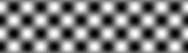

In [188]:
#B=5000 lagrange
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution_x = N_x_high_lag
resolution_y = N_y_high_lag
b = b_high_lag
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Itreative) for b=6.0, N_x = 181, Ny=46


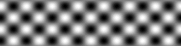

In [189]:
#B=50000 iterative
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution_x = N_x_high_iter
resolution_y = N_y_high_iter
b = b_high_iter #eight bits for quantization
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Itreative)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

Reconstruct image(Lagrange and search) for b=5, N_x = 185, Ny=54


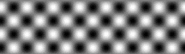

In [190]:
#B=5000 iterative
from google.colab.patches import cv2_imshow
# Define parameters
signal = Signal(A=2500, omega_x=7, omega_y=2)
resolution_x = N_x_high_search
resolution_y = N_y_high_search
b = b_high_search
# Create a grid of x and y values at the centers of the cells
x = np.linspace(0, 1, resolution_x, endpoint=False) + 0.5 / resolution
y = np.linspace(0, 1, resolution_y, endpoint=False) + 0.5 / resolution
X, Y = np.meshgrid(x, y)

quantized = signal.quantize_signal(X, Y, b)

# Display the resized quantized signal using cv2_imshow
quantized_uint8 = (quantized * 255).astype(np.uint8)
print(f"Reconstruct image(Lagrange and search)" \
+f" for b={b}, N_x = {resolution_x}, Ny={resolution_y}")
cv2_imshow(quantized_uint8)

# Hadamard, Hadamard-Walsh, and Haar matrices

###a.
 Implement Hadamard matrices $H_{2^n}$ . This should be a function taking as input the
level n. This function should return a $2^n × 2^n$**bold text** matrix.

In [191]:
import numpy as np
import math
def hadamard_matrix(n:int) -> np.ndarray:
    if n == 0:
        return np.ones((1,1))
    if n == 1:
        return np.array([[1, 1], [1, -1]]) / np.sqrt(2)

    hamard_n_minus_1 = hadamard_matrix(n - 1)
    top = np.hstack((hamard_n_minus_1, hamard_n_minus_1)) # creates (Hn-1, Hn-1)
    bottom = np.hstack((hamard_n_minus_1, -hamard_n_minus_1))# creates (Hn-1, -Hn-1)

    return (np.vstack((top, bottom))) / np.sqrt(2) #concatenate vertically top and bottom




###b.
 Take the two orthonormal families $H_{2^n}$ and ${\{\sqrt{2^n}𝟙_{\Delta_i}(t)\}}_{i=1}^{2^n}$ into a new set of functions ${\{h_i(t)\}}_{i=1}^{2^n}$ by:

$$
\left(
\begin{array}{c}
h_1(t) \\
h_2(t) \\
\vdots \\
h_{2^n}(t)
\end{array}
\right)
= H_{2^n}^\top
\left(
\begin{array}{c}
\sqrt{2^n} \Delta_1(t) \\
\sqrt{2^n} \Delta_2(t) \\
\vdots \\
\sqrt{2^n} \Delta_{2^n}(t)
\end{array}
\right)
$$

plot the functions ${\{h_i(t)\}}_{i=1}^{2^n}$ for n=2, ... , 6

In [192]:
def standard_basis(n:int, x: np.ndarray, low=0, high=1):
    functions = []
    delta = (high-low)/2**n
    for i in range(2**n):
        begin = low + i * delta
        end = low + (i + 1) * delta
        func = np.sqrt(1 / delta) * np.where((x >= begin) & (x < end), 1, 0)
        functions.append(func)
    return np.array(functions)

def change_base(U: np.ndarray, function_set: np.ndarray):
  assert (U.shape[1] == function_set.shape[0])
  return U.T @ function_set

def plot_functions(x, functions, n, prefix="",low=-1.5,high=1.5):
    cols = 4
    rows = int(np.ceil(2**n / cols))
    plt.figure(figsize=(9, 2.5*rows))
    for i in range(2**n):
        plt.subplot(rows, cols, i + 1)
        plt.title(f"$h{prefix}_{{{i+1}}}(t)$ for n={n}")
        y = functions[i]
        plt.step(x, y, where='post')
        plt.ylim(low, high)
    plt.tight_layout()
    plt.show()

def plot_hadmard(n):
    t = np.linspace(0, 1, 2**7, endpoint=False)
    H = hadamard_matrix(n)
    basis_functions = standard_basis(n, t)
    transformed_functions = change_base(H, basis_functions)
    plot_functions(t, transformed_functions, n)

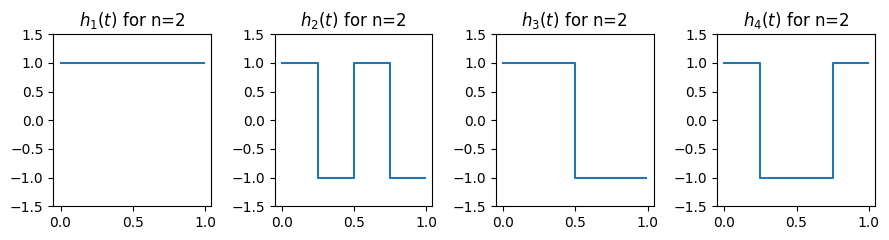

In [193]:
plot_hadmard(2)

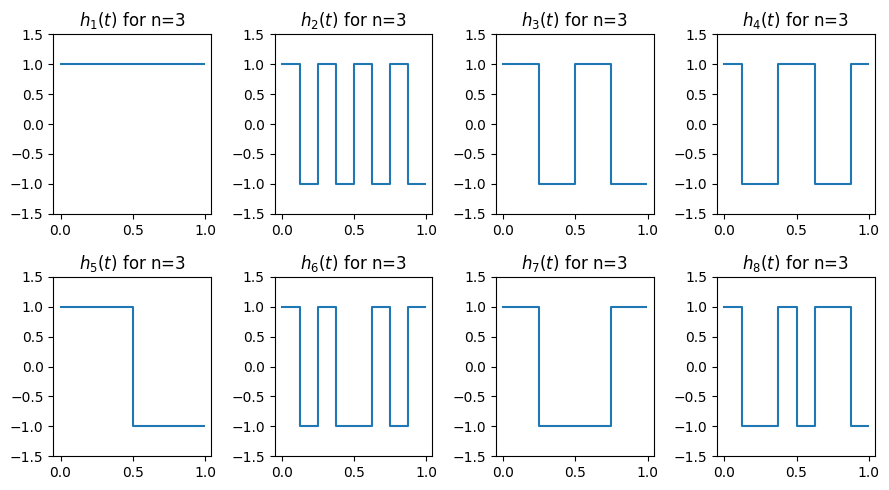

In [194]:
plot_hadmard(3)

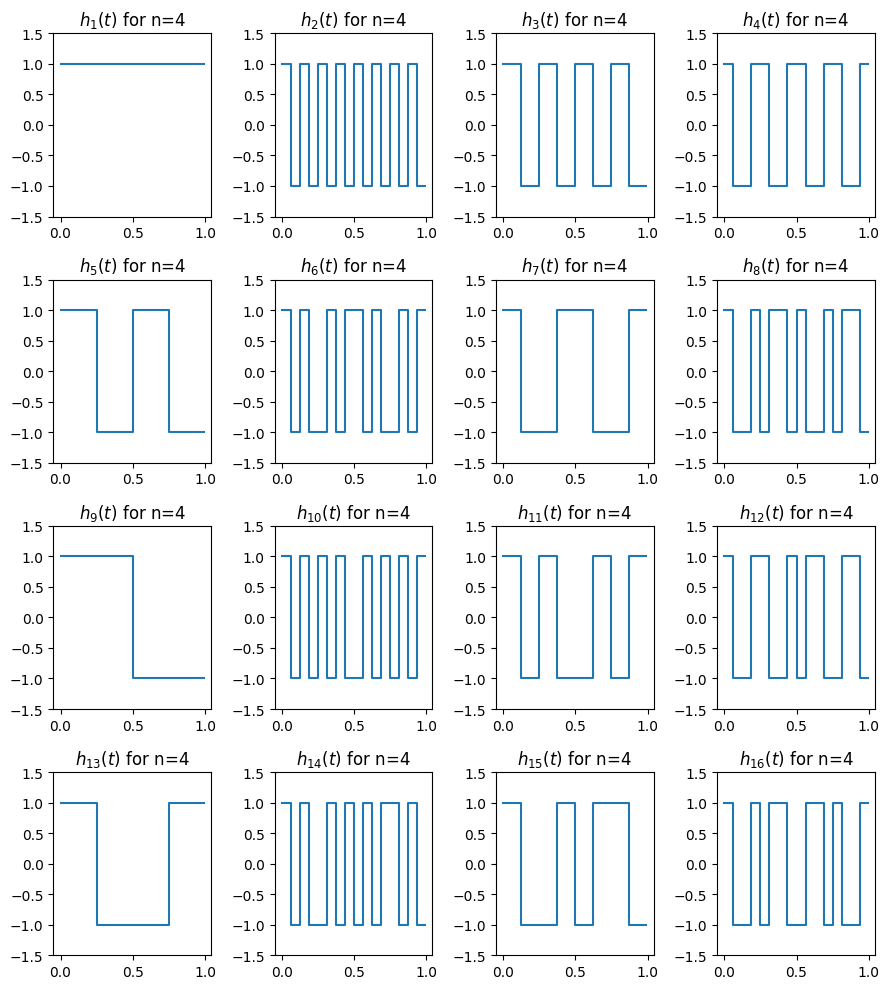

In [195]:
plot_hadmard(4)

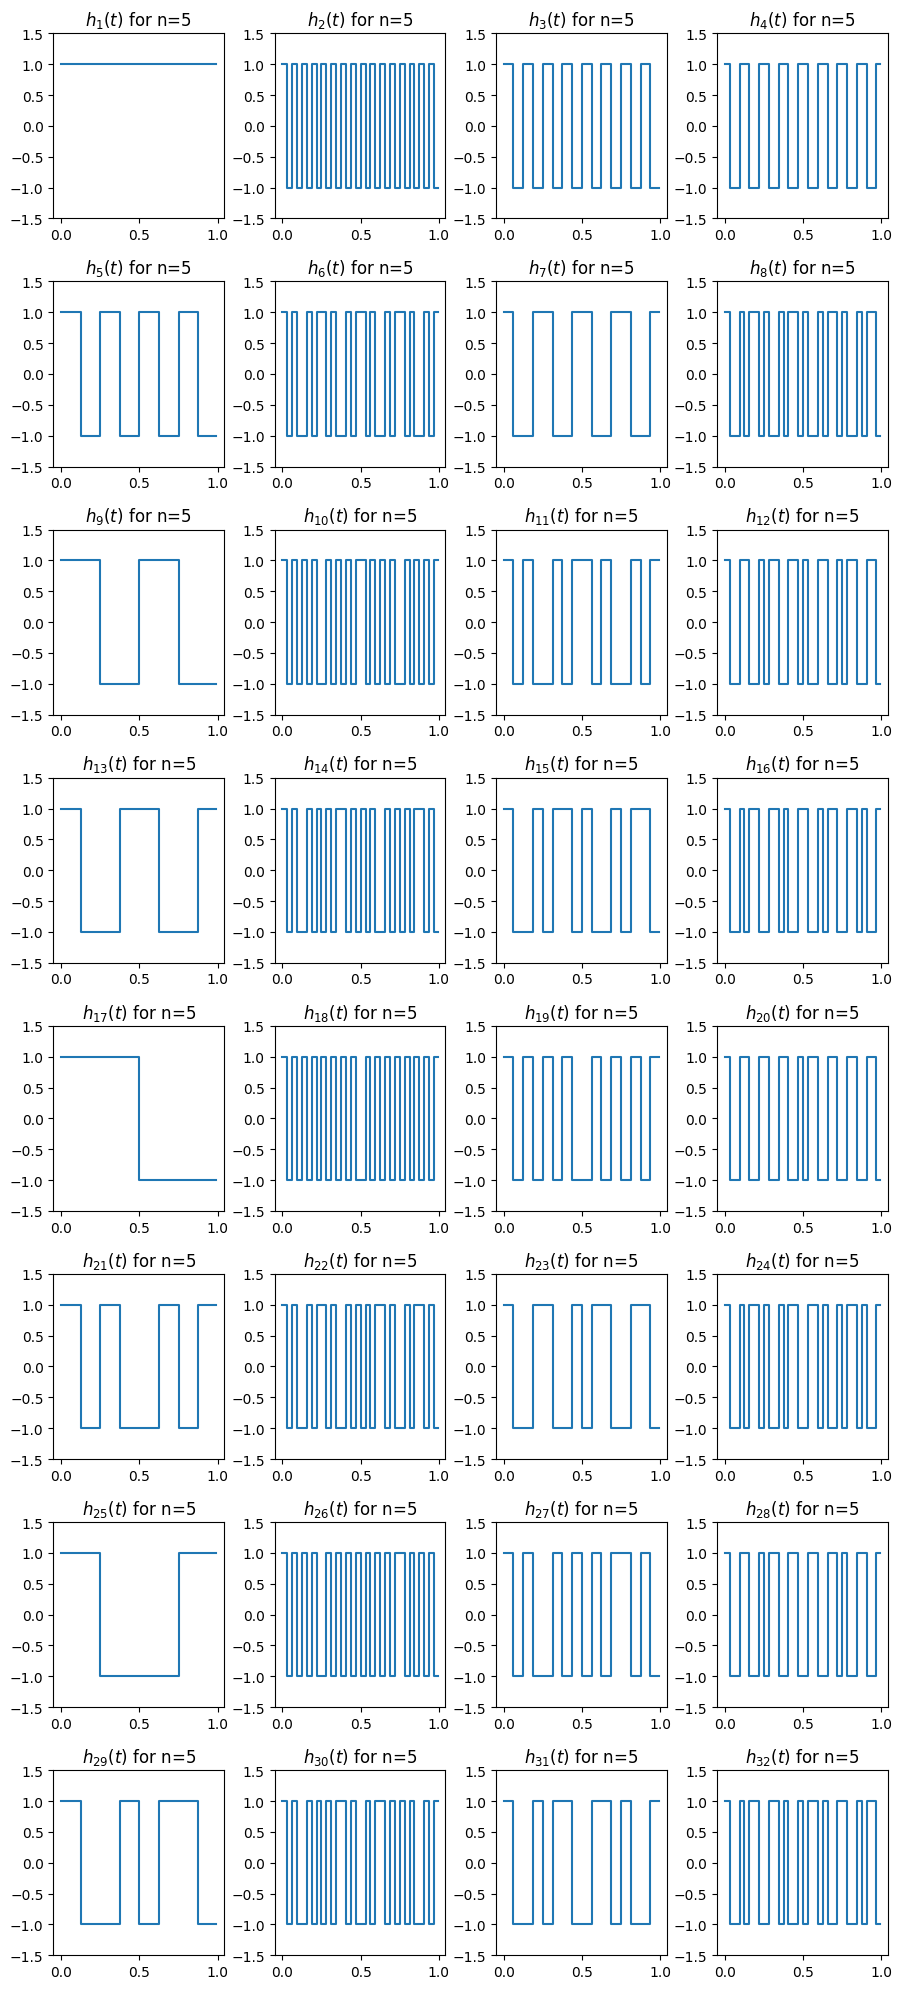

In [196]:
plot_hadmard(5)

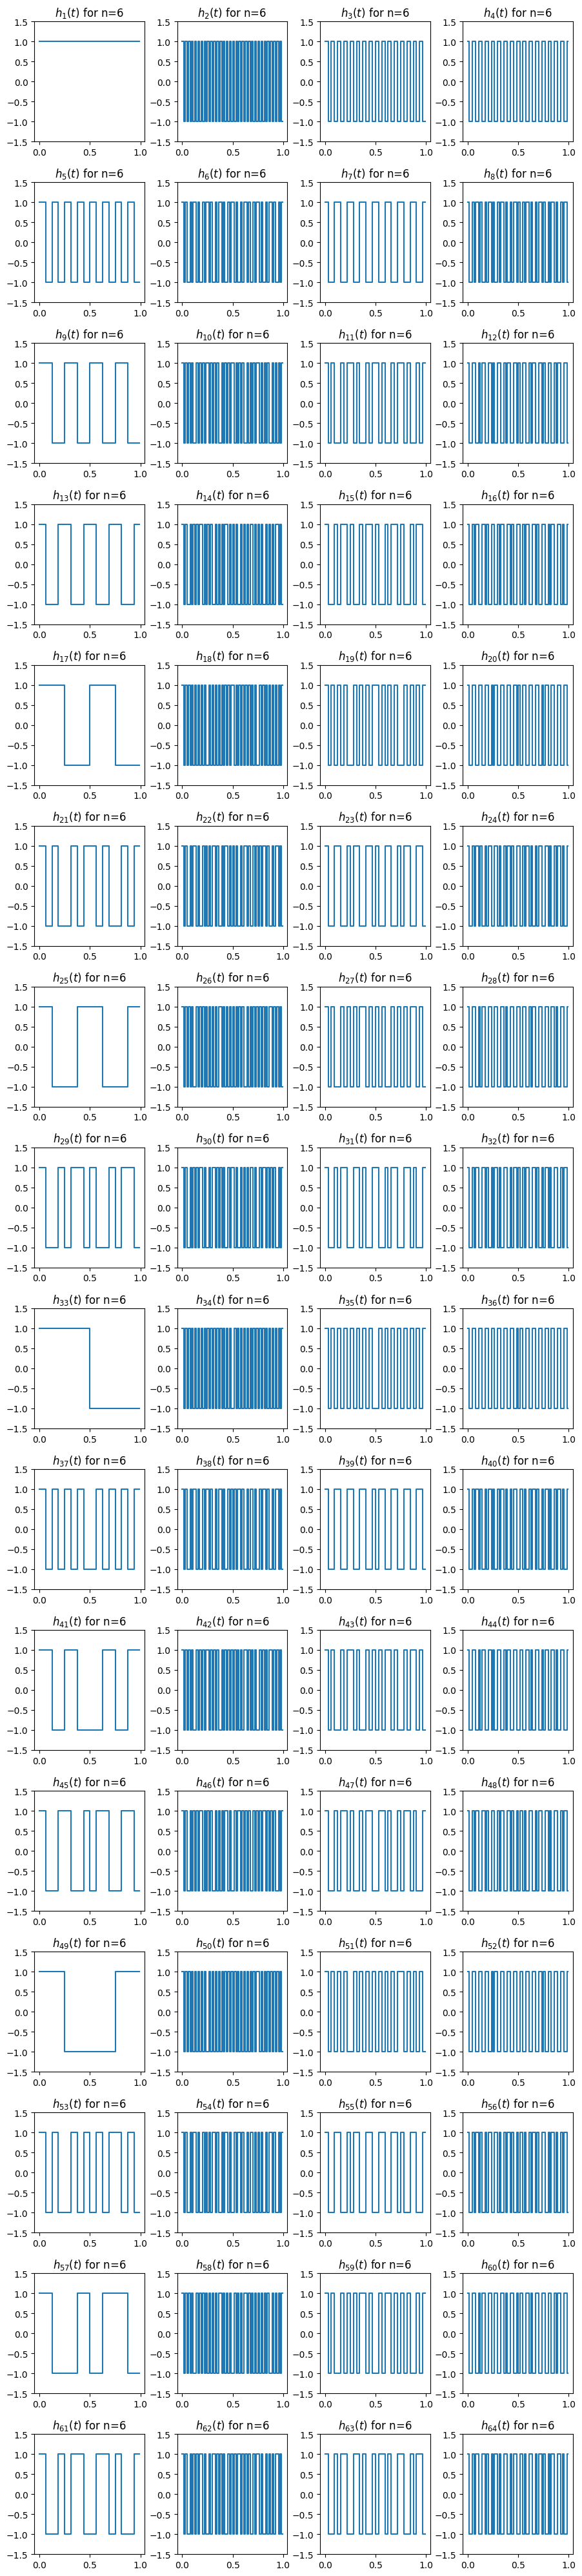

In [197]:
plot_hadmard(6)

###c.
Implement Walsh-Hadamard matrices $H_{2^n}$ . This should be a function taking as
input Hadamard matrices $H_{2^n}$ . This function should return a ${2^n} × {2^n}$ matrix.

In [198]:
def count_sign_changes(row: np.ndarray) -> int:
    return np.sum(row[:-1] * row[1:]<0)

def walsh_hadamard_matrix(n: int) -> np.ndarray:
    H = hadamard_matrix(n)
    sign_changes = np.array([count_sign_changes(row) for row in H])
    sorted_indices = np.argsort(sign_changes)
    W = H[sorted_indices]
    return W


###d.
 Take the two orthonormal families $\tilde{H_{2^n}}$ and ${\{\sqrt{2^n}𝟙_{\Delta_i}(t)\}}_{i=1}^{2^n}$ into a new set of functions ${\{hw_i(t)\}}_{i=1}^{2^n}$ by:

$$
\left(
\begin{array}{c}
hw_1(t) \\
hw_2(t) \\
\vdots \\
hw_{2^n}(t)
\end{array}
\right)
= \tilde{H_{2^n}}^\top
\left(
\begin{array}{c}
\sqrt{2^n} \Delta_1(t) \\
\sqrt{2^n} \Delta_2(t) \\
\vdots \\
\sqrt{2^n} \Delta_{2^n}(t)
\end{array}
\right)
$$

plot the functions ${\{hw_i(t)\}}_{i=1}^{2^n}$ for n=2, ... , 6

In [199]:
def plot_walsh_hadmard(n):
    t = np.linspace(0, 1, 2**7, endpoint=False)
    W = walsh_hadamard_matrix(n)
    basis_functions = standard_basis(n, t)
    transformed_functions = change_base(W, basis_functions)
    plot_functions(t, transformed_functions, n, prefix="w")

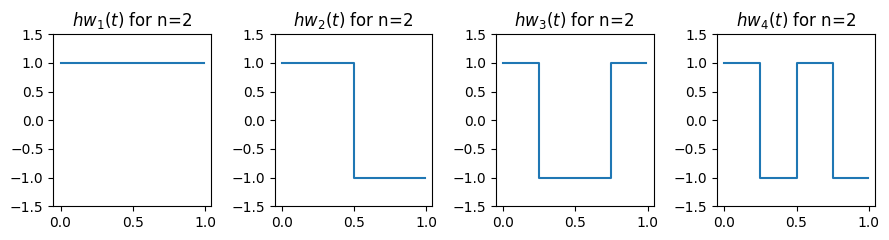

In [200]:
plot_walsh_hadmard(2)

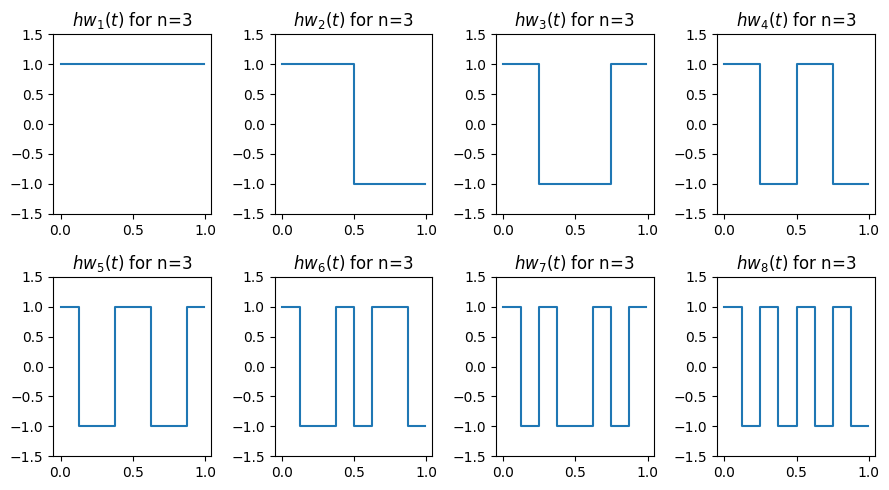

In [201]:
plot_walsh_hadmard(3)

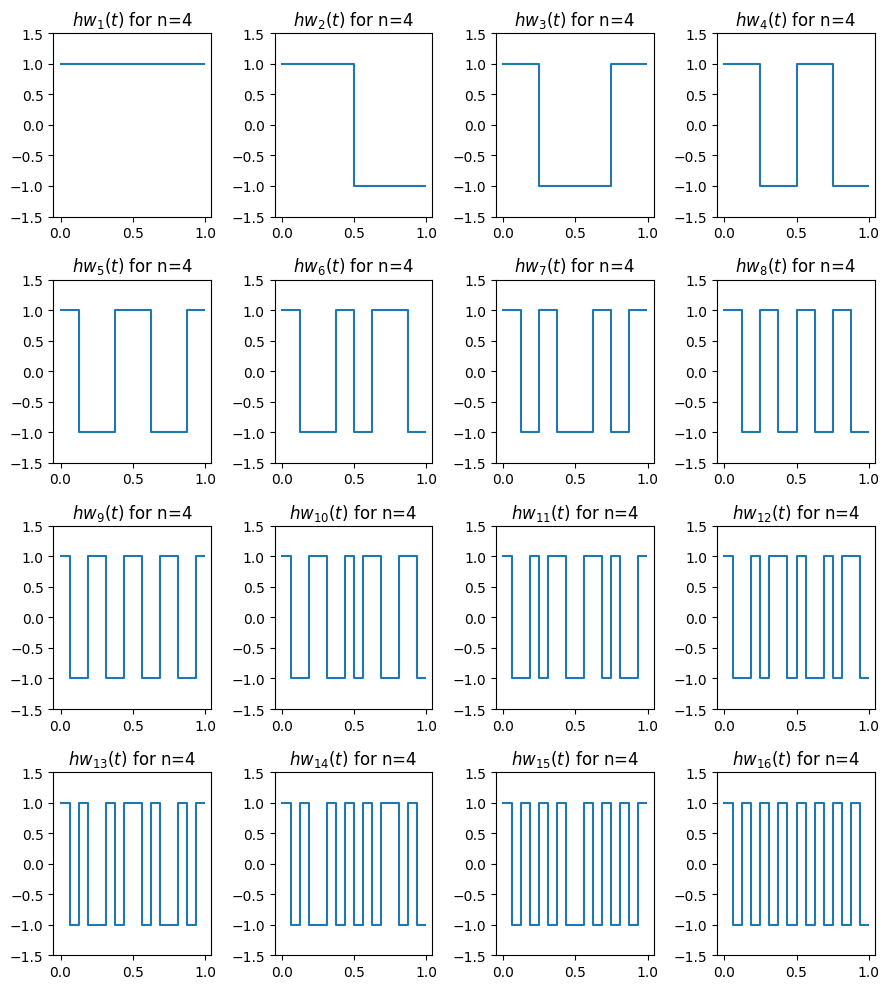

In [202]:
plot_walsh_hadmard(4)

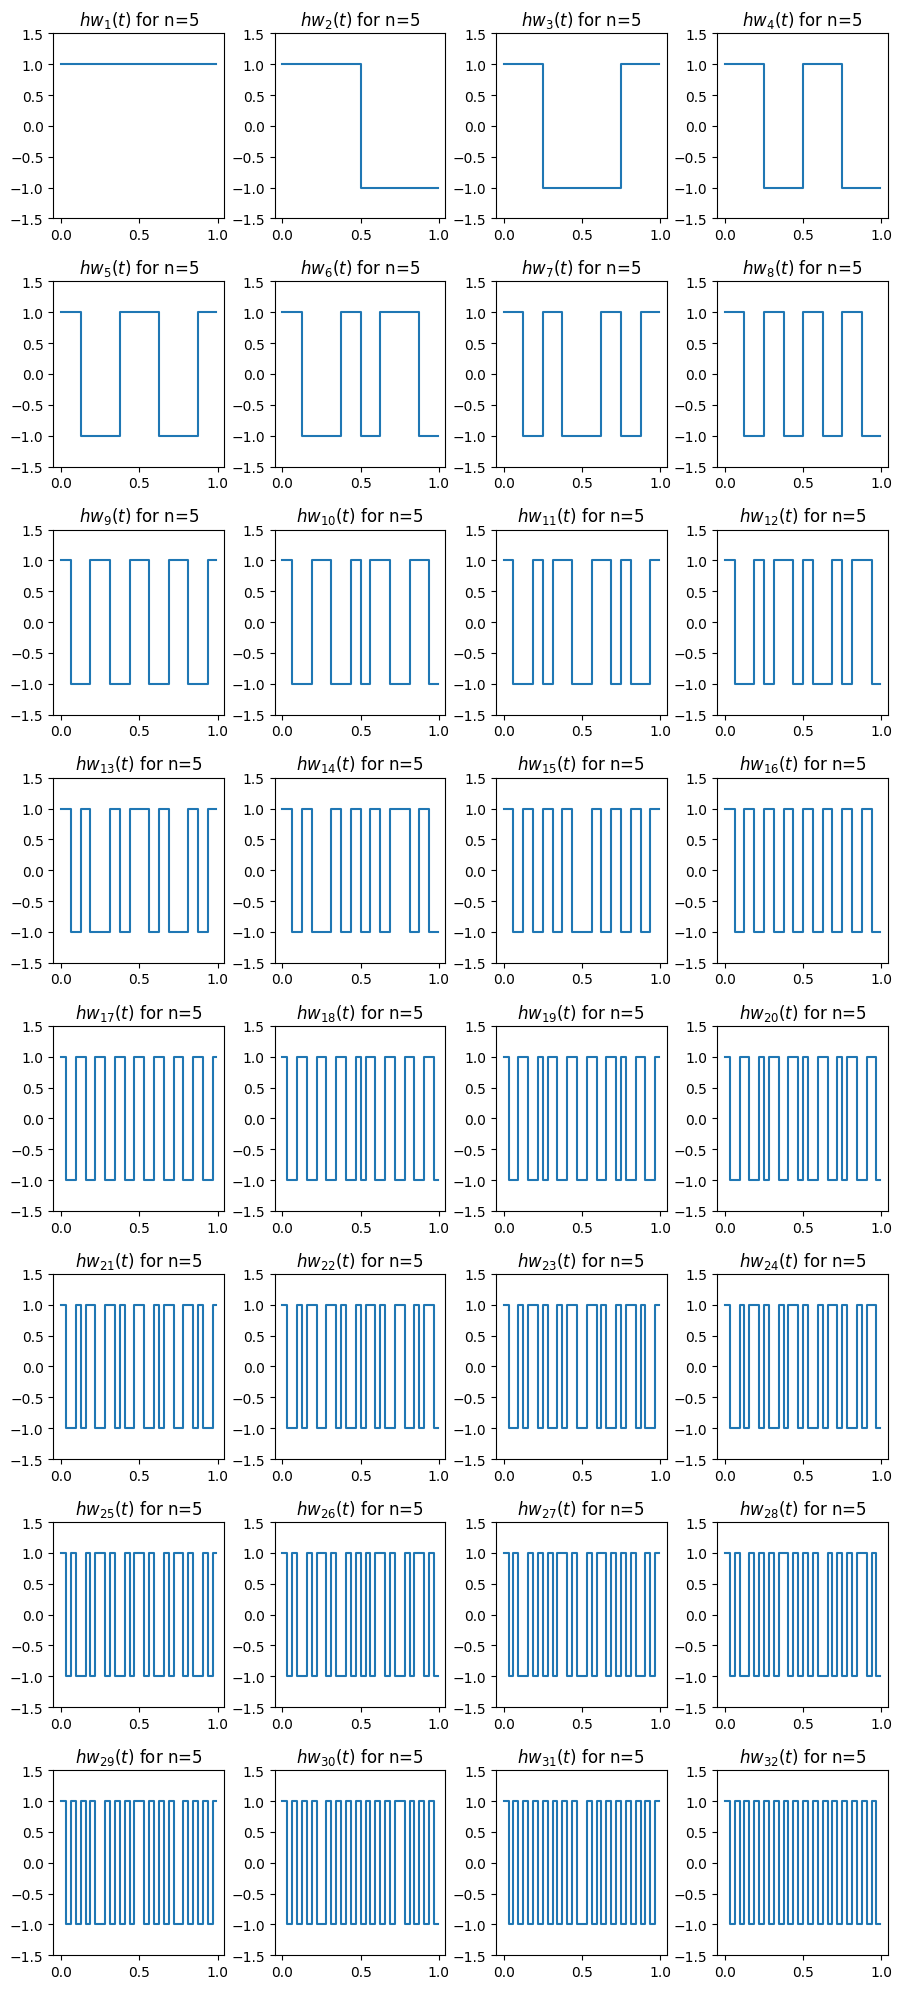

In [203]:
plot_walsh_hadmard(5)

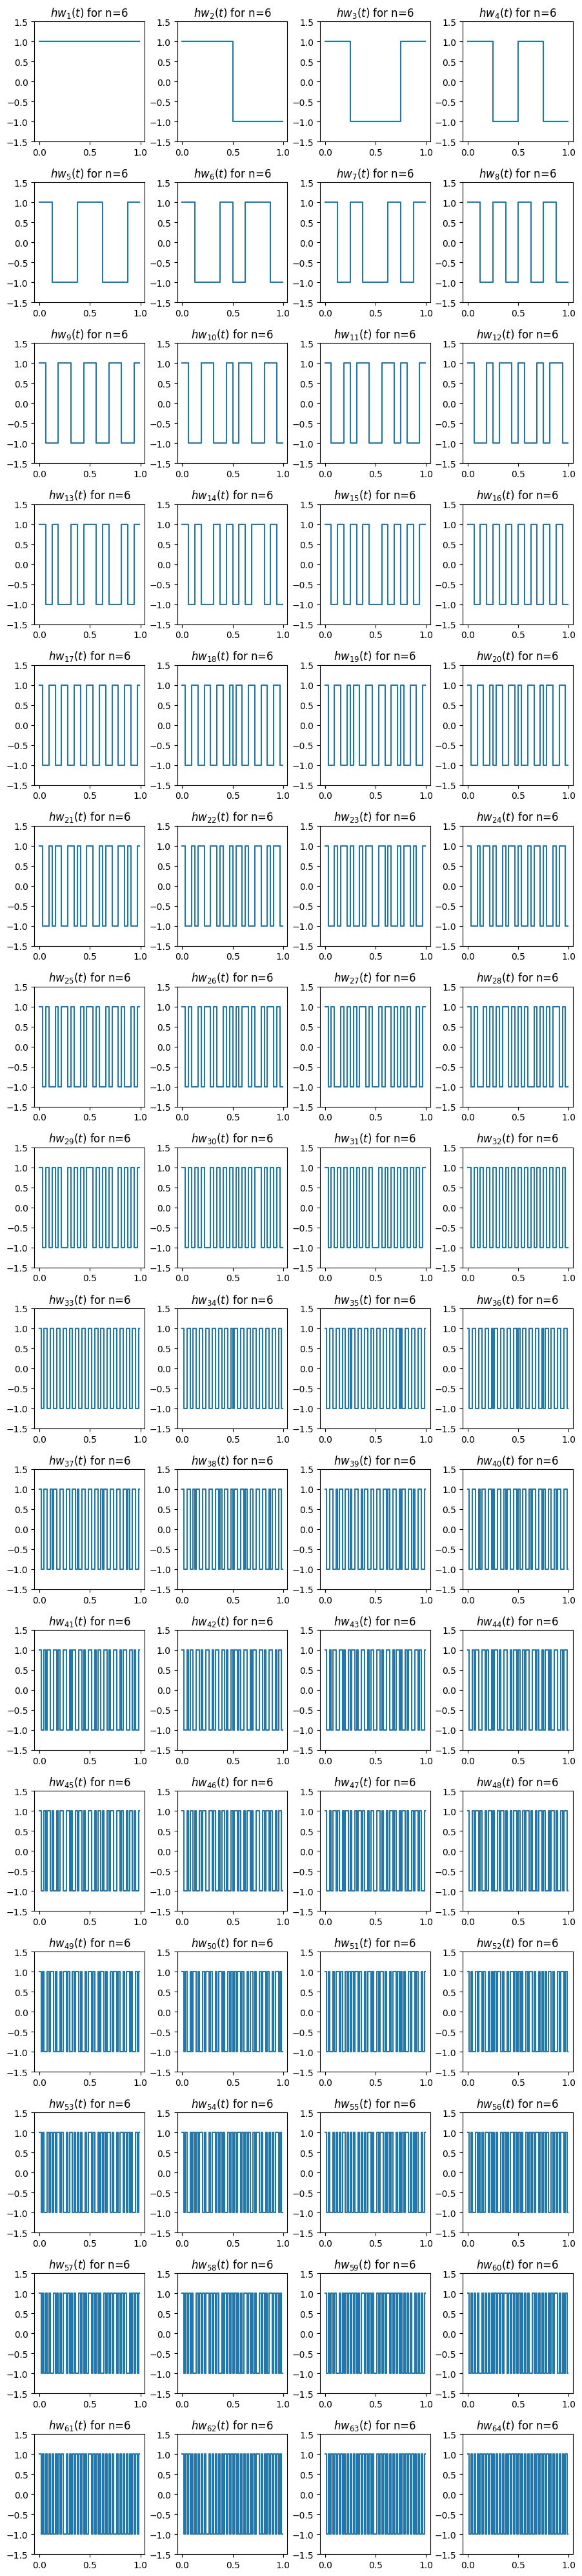

In [204]:
plot_walsh_hadmard(6)

###e.

Implement Haar matrices $\hat{H_{2^n}}$ as defined in the theory part in Exercise 4 question e. This should be a function taking as input the level n. This function should returna ${2^n} x {2^n}$ matrix.

In [205]:
def haar_matrix(n: int) -> np.ndarray:
    if n == 0:
        return np.array([[1]])

    H_n_minus_1 = haar_matrix(n - 1)
    I_n_minus_1 = np.eye(2**(n-1))

    top = np.kron(H_n_minus_1, np.array([1, 1]).reshape(-1, 1))
    bottom = np.kron(I_n_minus_1,np.array([1, -1]).reshape(-1, 1))
    b = np.hstack((top, bottom))/ np.sqrt(2)
    return b





###f.
 Take the two orthonormal families $\hat{H_{2^n}}$ and ${\{\sqrt{2^n}𝟙_{\Delta_i}(t)\}}_{i=1}^{2^n}$ into a new set of functions ${\{{ha}_i(t)\}}_{i=1}^{2^n}$ by:

$$
\left(
\begin{array}{c}
ha1(t) \\
ha_2(t) \\
\vdots \\
ha_{2^n}(t)
\end{array}
\right)
= \hat{H_{2^n}}^\top
\left(
\begin{array}{c}
\sqrt{2^n} \Delta_1(t) \\
\sqrt{2^n} \Delta_2(t) \\
\vdots \\
\sqrt{2^n} \Delta_{2^n}(t)
\end{array}
\right)
$$

plot the functions ${\{hw_i(t)\}}_{i=1}^{2^n}$ for n=2, ... , 6

In [206]:
def plot_haar(n, low=-1.5, high=1.5):
    t = np.linspace(0, 1, 2**7, endpoint=False)
    H = haar_matrix(n)
    basis_functions = standard_basis(n, t)
    transformed_functions = change_base(H, basis_functions)
    plot_functions(t, transformed_functions, n,prefix='a', low=low, high=high)

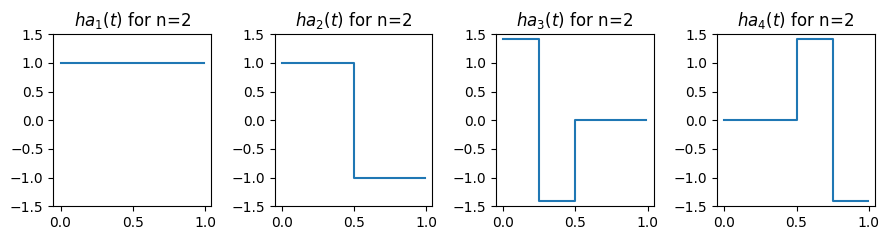

In [207]:
plot_haar(2)

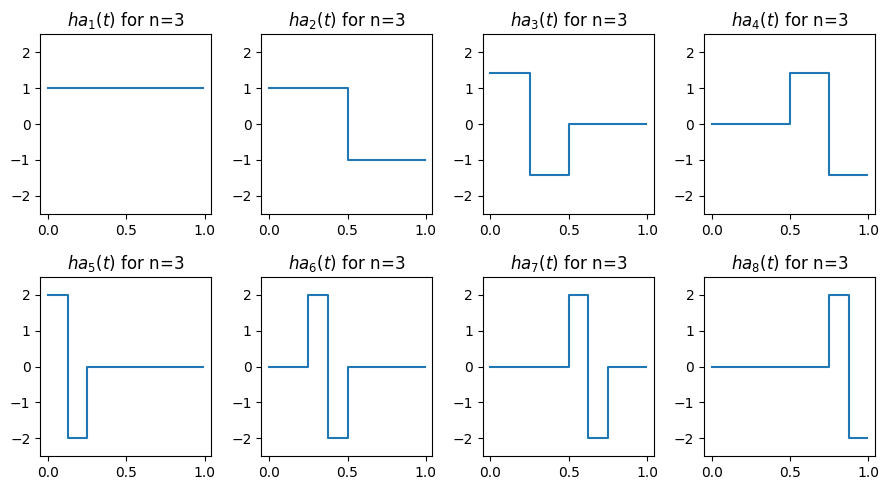

In [208]:
plot_haar(3,low=-2.5, high=2.5 )

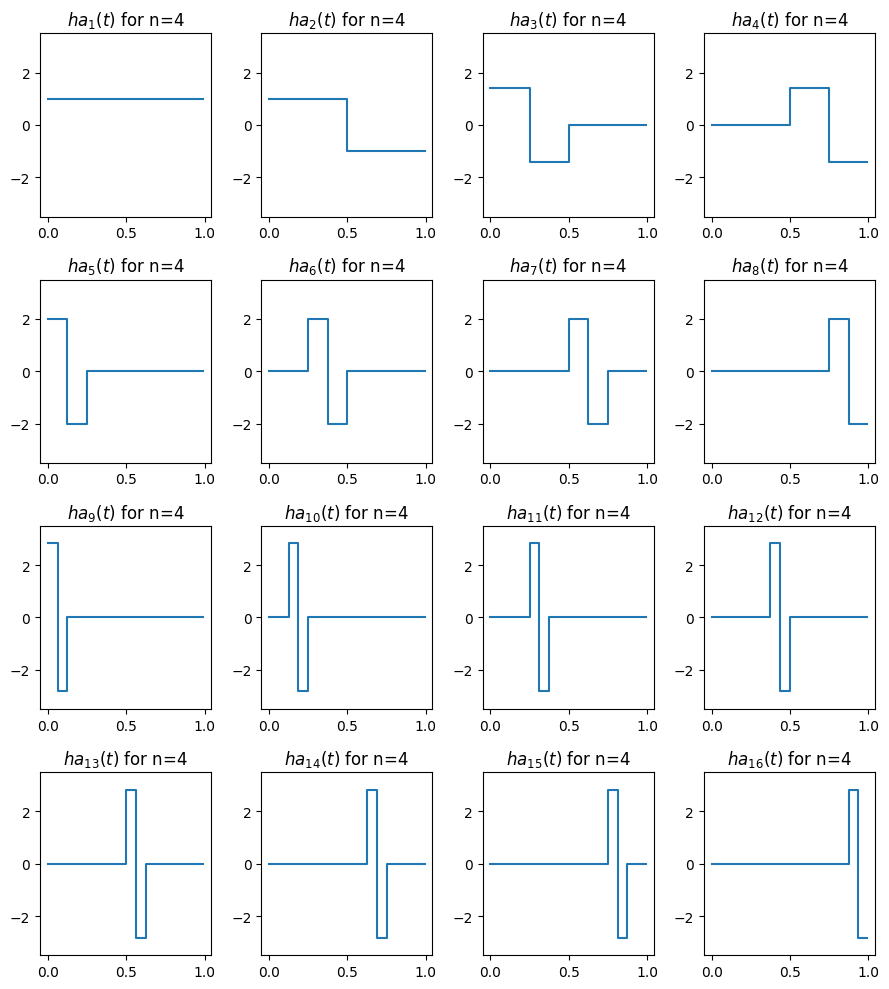

In [209]:
plot_haar(4,low=-3.5, high=3.5)

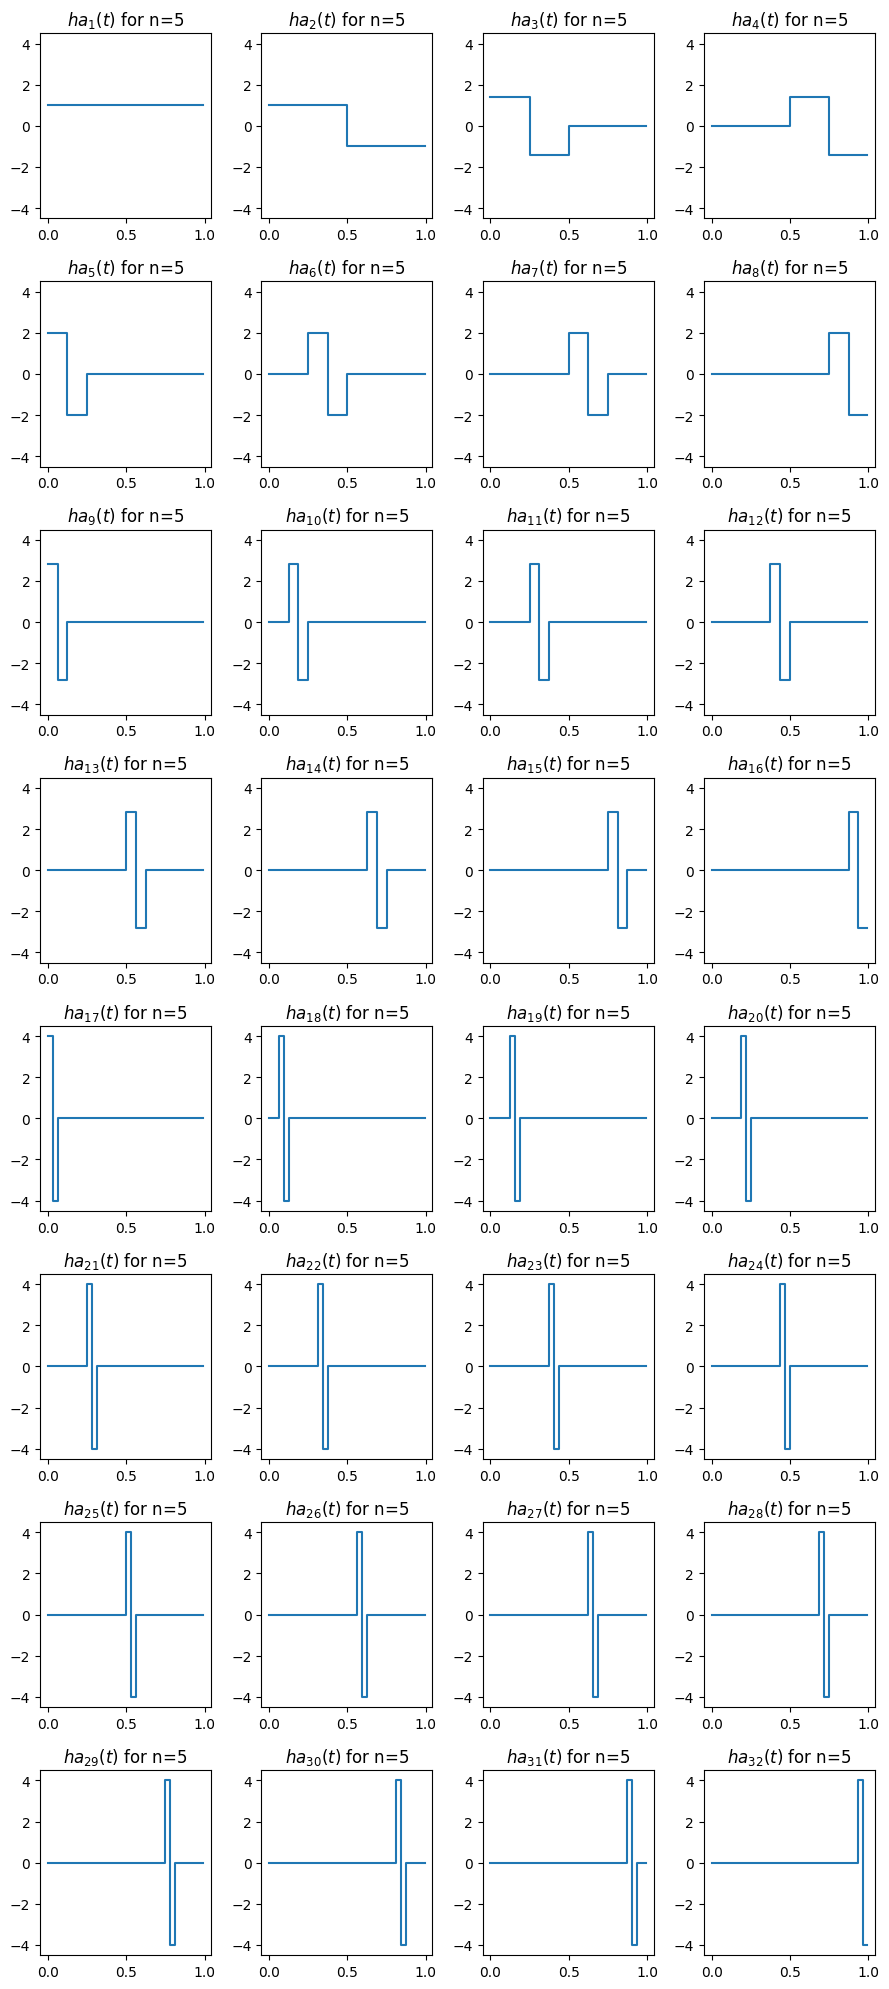

In [210]:
plot_haar(5,low=-4.5, high=4.5)

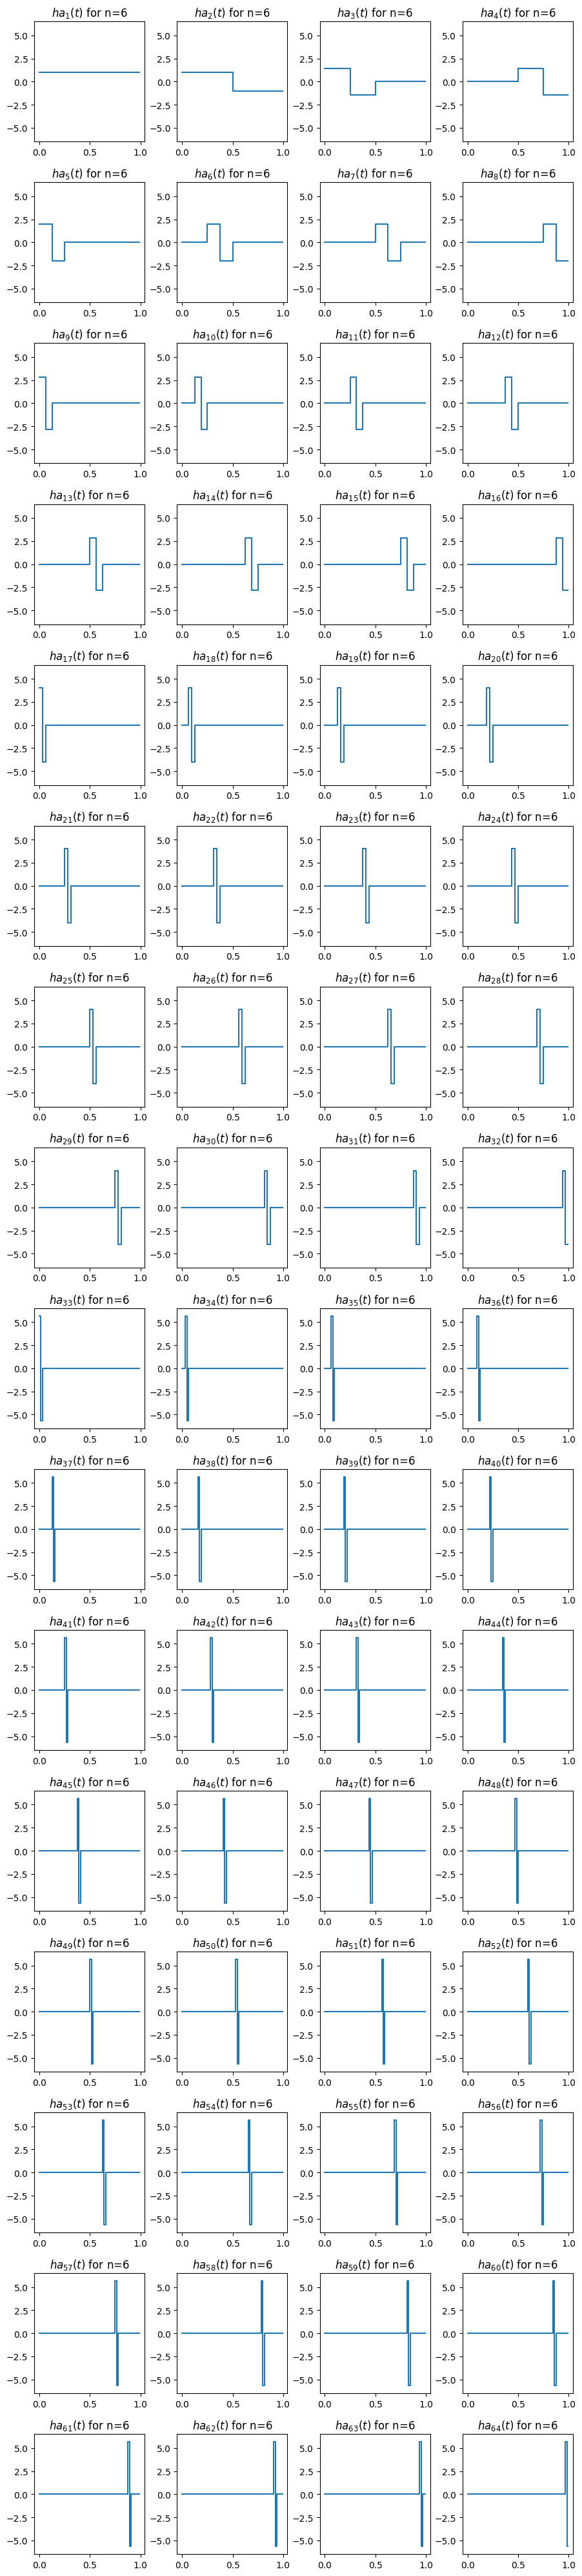

In [211]:
plot_haar(6,low=-6.5, high=6.5)

###g.

Given t ∈ [−4, 5], consider a function
ϕ(t) = t exp(t).
Consider n = 2, what are the best k-term approximation of ϕ(t) for k = 1, ..., $2^n$
in each basis? Present the results on a graph. What are the corresponding MSE errors?

Solution:
For a given basis of orthonormal functions $\{β_i\}_{i=1}^N$ ,the best approximation is $Σ_{i=1}^N <\beta_i(t), ϕ(t)>\beta_i(t)$.

We can create new orthonormal families from the standard basis by applying a unitary base change using a unitary matrix:
$$
\left(
\begin{array}{c}
b1(t) \\
b2(t) \\
\vdots \\
b_{2^n}(t)
\end{array}
\right)
= {U}^\top
\left(
\begin{array}{c}
\sqrt{\frac{1}{|Δ_1|}}\, \Delta_1(t) \\
\sqrt{\frac{1}{|Δ_2|}}\, \Delta_2(t) \\
\vdots \\
\sqrt{\frac{1}{|Δ_N|}}\, \Delta_{2^n}(t)
\end{array}
\right)
$$
We can achieve the new coefficients representing the signal in the new basis by transforming the coefficients of the standard basis:
$$
\left(
\begin{array}{c}
Ψ_1^{\,b} \\
Ψ_2^{\,b} \\
\vdots \\
Ψ_{N}^{\,b}(t)
\end{array}
\right)
= {U}^\top
\left(
\begin{array}{c}
Ψ_1^{\,s} \\
Ψ_2^{\,s} \\
\vdots \\
Ψ_{N}^{\,s}
\end{array}
\right)
$$

Using this logic, it's sufficient to calculate the optimal coefficients of the signal ϕ(t) = t exp(t) using the standard basis, and then use these coefficients to approximate the optimal coefficients of other bases.

Given that n = 2, $t\in [-4,5]$ , uniform sampling will create us the following standard basis:


$\Delta= \frac{5-(-4)}{2^2} = \frac{9}{4}$


$\Delta_i= [-4 + iΔ, -4+(i+1)Δ] = [l_i,h_i] \,\,for\, i=0,1,2,3$



$\{β^s\}_{i=1}^4$ = {$\sqrt{\frac{4}{9}}𝟙_{[-4,-1.75]}, \sqrt{\frac{4}{9}}𝟙_{[-1.75, 0.5]}, \sqrt{\frac{4}{9}}𝟙_{[0.5, 2.75]}, \sqrt{\frac{4}{9}}𝟙_{[2.75, 5]}$}

<g(t),f(t)> = $∫_{-4}^5 g(t)f(t)\,dt$

Thus, we can calculate the optimal coefficients when representing the signal in the standard basis as follows:

$∫exp(t) t \,dt = exp(t)t - ∫exp(t)\,dt = exp(t)t - exp(t) = exp(t)(t-1)$

$Ψ_i^{\,s} <\phi(t),β_i^s> \, = ∫_{\Delta_i} exp(t)\sqrt{\frac{4}{9}} t\,dt = \sqrt{\frac{4}{9}}[exp(t)(t-1)]_{t=l_i}^{t=h_i}$


We will use this closed formula to calculate the coefficients of the standard basis and then we will transform them using unitary bases to the requested bases (Hadamard, Haar, Walsh-Hadamard).


In [212]:
def calc_optimal_standard_coefficients(basis_functions: np.ndarray,
                                       low:float, high:float, n:int)-> np.ndarray:
    num_intervals = 2**n
    delta = (high - low) / num_intervals

    intervals = np.linspace(low, high, num_intervals + 1)
    l = intervals[:-1]
    h = intervals[1:]

    exp_h = np.exp(h)
    exp_l = np.exp(l)

    coefficients = np.sqrt(1 / delta) * (exp_h * (h - 1) - exp_l * (l - 1))
    #coefficients = (basis_functions @ signal) * delta

    return np.array(coefficients)

def calc_optimal_coefficients(unitary:np.ndarray,
                              standard_coefficients: np.ndarray) -> np.ndarray:

    return unitary.T @ standard_coefficients

def mse_basis_change(original:np.ndarray, approximation:np.ndarray)-> float:
    return np.mean((original - approximation)**2)

def k_term_approximation(signal:np.ndarray, basis_functions:np.ndarray,
                         unitary:np.ndarray,
                         k:int,
                         low:float, high:float,
                         n:int) -> np.ndarray:
    assert(basis_functions.shape[0] == 2**n)
    standard_coefficients = calc_optimal_standard_coefficients(basis_functions,
                                                              low=low,
                                                               high=high, n=n)
    coefficients = calc_optimal_coefficients(unitary, standard_coefficients)
    sorted_indices = np.argsort(-np.abs(coefficients))
    sorted_basis = basis_functions[sorted_indices]
    sorted_coefficients = coefficients[sorted_indices]

    # Zero out coefficients after the top k
    sorted_coefficients[k:] = 0

    # Perform the matrix multiplication to get the approximation
    approximation = np.dot(sorted_coefficients, sorted_basis)

    return approximation, coefficients


def phi(t:np.ndarray) -> np.ndarray:
    return t * np.exp(t)

def plot_approximations(x, original_signal, approximations, n, basis_name):
    cols = 4
    rows = int(np.ceil(2**n / cols))
    plt.figure(figsize=(15, 4*rows))
    for i, approx in enumerate(approximations):
        plt.subplot(rows, cols, i + 1)
        plt.plot(x, original_signal, label='Original', color='black')
        plt.plot(x, approx, label=f'{i+1}-term Approximation',
                 linestyle='dashed')
        plt.title(f'{basis_name} Basis, k={i+1}')
        plt.legend()
    plt.tight_layout()
    plt.show()

def plot_mse(k_range, mse_values, basis_name):
    plt.plot(k_range, mse_values, marker='o')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title(f'Mean squared error as a function of k for {basis_name} basis')
    plt.grid(True)
    plt.show()

def plot_k_term_for_base(unitary_matrix: np.ndarray, base_name:str):
  n = 2
  x = np.linspace(-4, 5, 100)
  original_signal = phi(x)
  standard_functions = standard_basis(n, x, low=-4, high=5)
  requested_basis_functions = change_base(unitary_matrix, standard_functions)
  approximations= []
  mse= []
  k_range = np.arange(1, 2**n + 1)
  for k in k_range:
      approx, coeff = k_term_approximation(original_signal,
                                           requested_basis_functions,
                                           unitary_matrix, k, low=-4,
                                           high=5, n=n)
      approximations.append(approx)
      mse.append(mse_basis_change(original_signal, approx))
      if(k == 2**n):
        coeff_for_print = [f"{x:.3f}" for x in coeff]
        print(f"The non sorted coefficients for {base_name} basis are {coeff_for_print}\n")

  plot_approximations(x, original_signal, approximations, n, base_name)
  print("\nThe mse values of the k approximations are:\n")
  for k, mse_value in zip(k_range, mse):
    print(f"k={k}, MSE={mse_value}")
  plot_mse(k_range, mse, base_name)

###Plotting k-term best approximations for standard basis

The non sorted coefficients for Standard basis are ['-0.258', '-0.231', '18.799', '377.519']



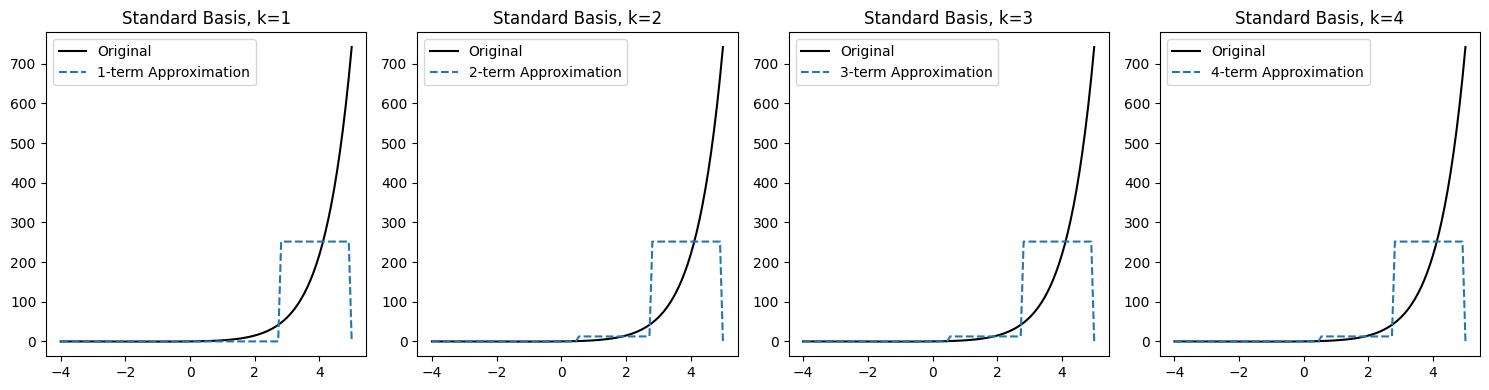


The mse values of the k approximations are:

k=1, MSE=13423.38786112699
k=2, MSE=13382.2221230829
k=3, MSE=13382.215038329885
k=4, MSE=13382.208965131673


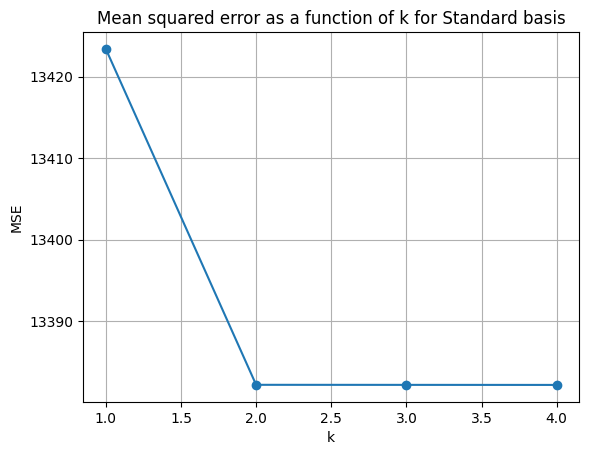

In [213]:
n=2
plot_k_term_for_base(np.eye(2**n, 2**n), "Standard")

###Plotting k-term best approximations for Haar basis

The non sorted coefficients for Haar basis are ['197.915', '-198.403', '-0.019', '-253.653']



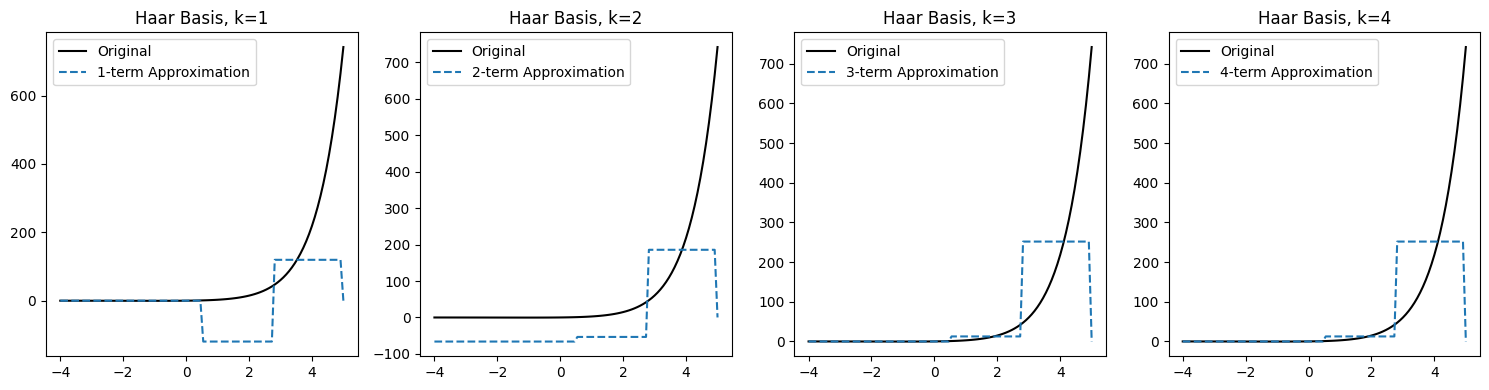


The mse values of the k approximations are:

k=1, MSE=21461.678108608532
k=2, MSE=17455.263190391146
k=3, MSE=13382.2089812949
k=4, MSE=13382.208965131675


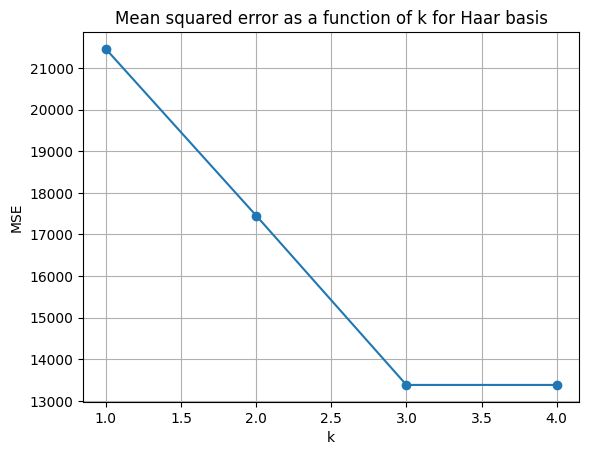

In [214]:
n=2
haar = haar_matrix(n)
plot_k_term_for_base(haar, "Haar")

###Plotting k-term best approximations for Hadmard basis

The non sorted coefficients for Hadmard basis are ['197.915', '-179.373', '-198.403', '179.346']



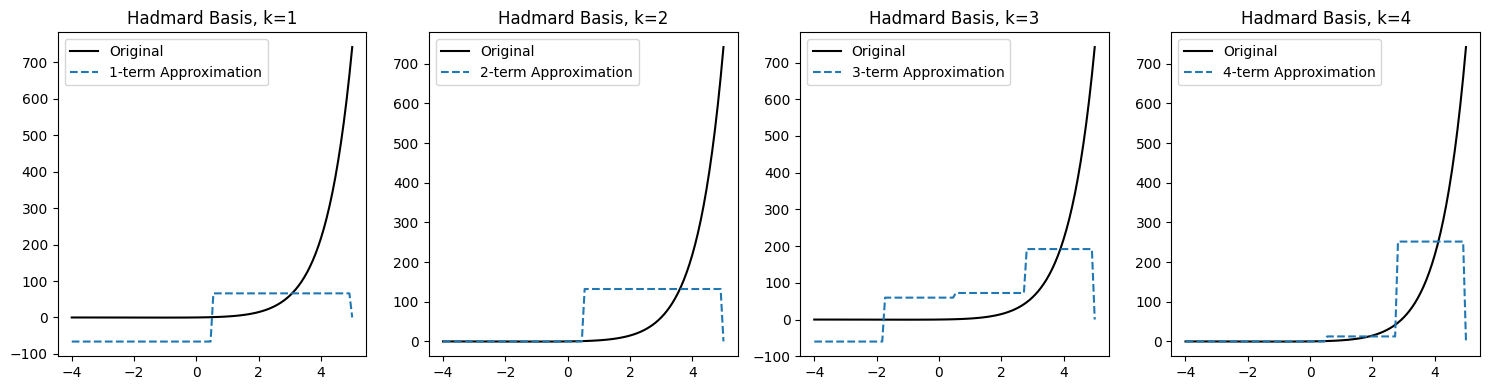


The mse values of the k approximations are:

k=1, MSE=23839.935193700217
k=2, MSE=19924.649543298772
k=3, MSE=16688.822303498433
k=4, MSE=13382.208965131675


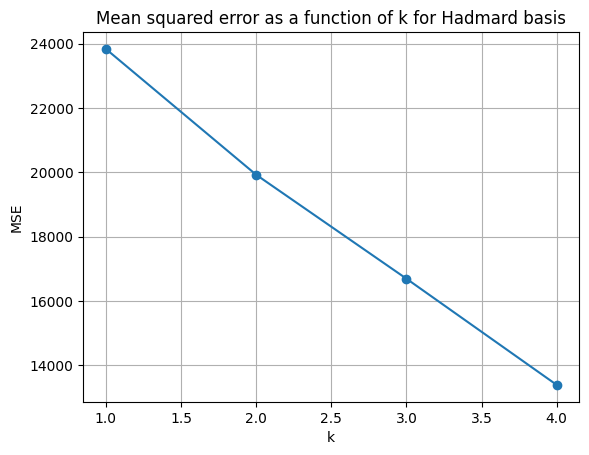

In [215]:
n=2
haar = hadamard_matrix(n)
plot_k_term_for_base(haar, "Hadmard")

###Plotting k-term best approximations for Walsh Hadmard basis

The non sorted coefficients for Walsh Hadmard basis are ['197.915', '-198.403', '179.346', '-179.373']



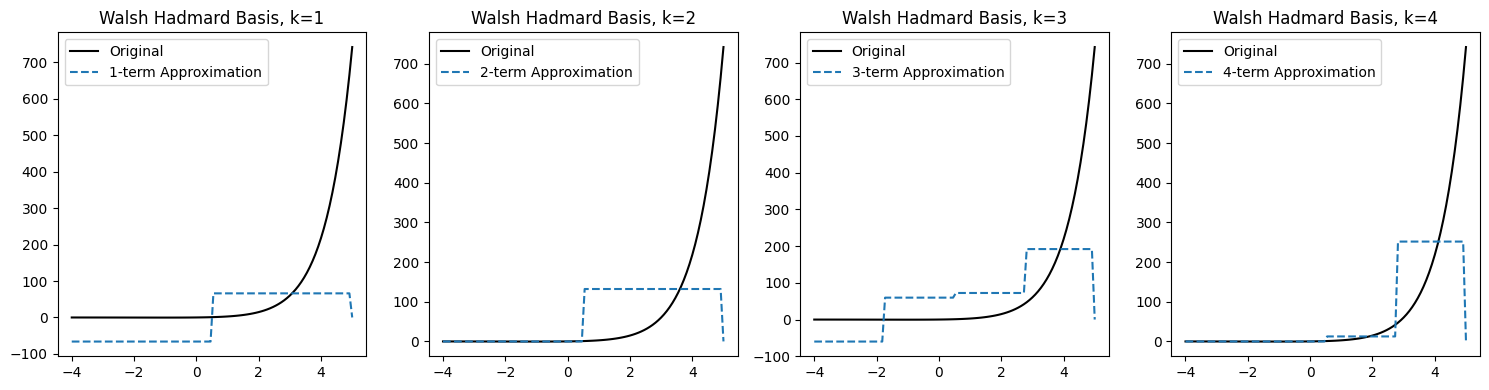


The mse values of the k approximations are:

k=1, MSE=23839.935193700217
k=2, MSE=19924.649543298772
k=3, MSE=16688.822303498433
k=4, MSE=13382.208965131675


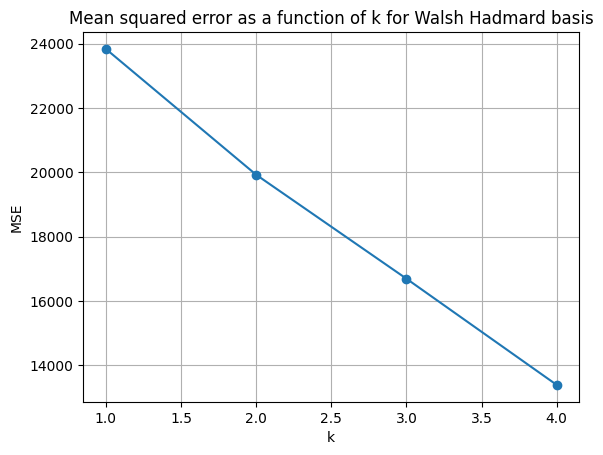

In [216]:
n=2
haar = walsh_hadamard_matrix(n)
plot_k_term_for_base(haar, "Walsh Hadmard")

We observed that the standard basis is the most effective for representing the signal. This can be attributed to the function exp(x)x having a high rate of change within the interval [2.75, 5] (indicated by the largest coefficient in that range). Consequently, using this function alone captures the "change" in the signal, even though other intervals are ignored.

The second-best basis in terms of Mean Squared Error (MSE) is the Haar basis.

As expected, the Hadamard and Walsh-Hadamard bases yield identical approximations for each
k, as they represent the same basis but ordered differently. Since we prioritize the basis by the largest coefficients, this reordering does not affect the result. Additionally, for k=4, all four bases (standard, Haar, Hadamard, and Walsh-Hadamard) result in the same error. This outcome is anticipated because all four bases span the same subspace for k=4.